<a href="https://colab.research.google.com/github/sultanjulyan/IF5140-Praktikum-1-Klasifikasi/blob/main/IF5140_Praktikum_1_Klasifikasi_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama:

NIM:

# Import Library & Dataset

[Link Dataset](https://drive.google.com/file/d/1IjVOEJ-gQV9uxXyYNvbAcNPZvdmDQCrO/view?usp=drive_link)

Deskripsi Dataset:

1. Student ID: Identifikasi unik untuk setiap siswa.
2. Age: Usia siswa (15-18 tahun).
3. Gender: Jenis kelamin siswa (0: Laki-Laki, 1: Perempuan).
4. Ethnicity: Etnis siswa (0: Caucasian, 1: African American, 2: Asian, 3: Other).
5. Parental Education: Tingkat edukasi orang tua siswa (0: Tidak ada, 1: SMA, 2: Some College, 3: S1, 4: S2/S3).
6. StudyTimeWeekly: Lama waktu yang dihabiskan untuk belajar (0-20 jam).
7. Absences: Jumlah absen selama satu tahun sekolah (0-30 kali).
8. Tutoring: Apakah pelajar mengikuti tutor atau tidak (0: No, 1: Yes).
9. Parental Support: Tingkat keterlibatan orang tua dalam pembelajaran siswa (0: Tidak ada, 1: Rendah, 2: Sedang, 3: Tinggi, 4: Sangat Tinggi).
10. Extracurricular: Apakah siswa mengikuti aktivitas ekstrakurikuler (0: Tidak, 1: Ya).
11. Sports: Apakah siswa bepartisipasi pada kegiatan olahraga (0: Tidak, 1: Ya).
12. Music: Apakah siswa berpartisipasi pada kegiatan musik (0: Tidak, 1: Ya).
13. Volunteering: Apakah siswa berpartisipasi pada kegiatan sukarela  (0: Tidak, 1: Ya).
14. Grade Class: Klasifikasi nilai siswa (0: A, 1: B, 2: C, 3: D, 4: F).


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
df = pd.read_csv("/content/Student_performance_data_prak_1_.csv")

# Exploratory Data Analysis (EDA)

**Descriptive Analysis**

Melakukan analisis pada dataset untuk mendapatkan gambaran singkat terkait dataset seperti jumlah kolom dan baris, tipe data, jumlah null values pada dataset, dan lain-lain.

`df.head()`

`df.info()`

`df.describe()`

`df.isnull()`

**Visualization**

**Berikan contoh minimal 3 (tiga) visualisasi hasil eksplorasi dataset beserta penjelasan singkat untuk setiap visualisasi.**


In [29]:
df.head(20)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
0,1001,17,Female,Caucasian,2,19.833723,7,1,2,0,0,1,0,C
1,1002,18,Male,Caucasian,1,15.408756,0,0,1,0,0,0,0,B
2,1003,15,Male,Asian,3,4.210570,26,0,2,0,0,0,0,F
3,1004,17,Female,Caucasian,3,10.028829,14,0,3,1,0,0,0,D
4,1005,17,Female,Caucasian,2,4.672495,17,1,3,0,0,0,0,F
5,1006,18,Male,Caucasian,1,8.191219,0,0,1,1,0,0,0,B
6,1007,15,Male,African American,1,15.601680,10,0,3,0,1,0,0,C
7,1008,15,Female,African American,4,15.424496,22,1,1,1,0,0,0,F
8,1009,17,Male,Caucasian,0,4.562008,1,0,2,0,1,0,1,C
9,1010,16,Female,Caucasian,1,18.444466,0,0,3,1,0,0,0,A


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   object 
 3   Ethnicity          2392 non-null   object 
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GradeClass         2392 non-null   object 
dtypes: float64(1), int64(10), object(3)
memory usage: 261.8+ KB


In [31]:
df['GradeClass'] = df['GradeClass'].map({
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5
})

In [32]:
df['Ethnicity'] = df['Ethnicity'].map({
    'Caucasian': 0,
    'African American': 1,
    'Asian': 2,
    'Other': 3
})

In [33]:
df['Gender'] = df['Gender'].map({
    'Male': 0,
    'Female': 1
})

In [34]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,1
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,5
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,3
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,5


In [35]:
numerical_column = df[['Age','Gender', 'ParentalEducation','StudyTimeWeekly', 'Absences','Tutoring','ParentalSupport','Extracurricular','Sports','Volunteering','GradeClass']]
numerical_column

,Age,Gender,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Volunteering,GradeClass
0,17,1,2,19.833723,7,1,2,0,0,0,2
1,18,0,1,15.408756,0,0,1,0,0,0,1
2,15,0,3,4.210570,26,0,2,0,0,0,5
3,17,1,3,10.028829,14,0,3,1,0,0,3
4,17,1,2,4.672495,17,1,3,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,3,10.680555,2,0,4,1,0,0,0
2388,17,0,1,7.583217,4,1,4,0,1,0,5
2389,16,1,2,6.805500,20,0,2,0,0,1,2
2390,16,1,0,12.416653,17,0,2,0,1,0,1


In [36]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,3.489967
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,1.673940
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,5.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,5.000000


In [37]:
numerical_column.corr()

,Age,Gender,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Volunteering,GradeClass
Age,1.000000,0.044895,0.025099,-0.006800,-0.011511,-0.012076,0.033197,-0.025061,-0.046320,0.013074,-0.006059
Gender,0.044895,1.000000,0.006771,0.011469,0.021479,-0.031597,0.008065,-0.005964,-0.008897,-0.000200,0.022118
ParentalEducation,0.025099,0.006771,1.000000,-0.011051,0.036518,-0.017340,-0.017463,0.007479,0.002029,0.011960,0.042310
StudyTimeWeekly,-0.006800,0.011469,-0.011051,1.000000,0.009326,0.028930,0.035800,-0.022860,0.006836,-0.016604,-0.130300
Absences,-0.011511,0.021479,0.036518,0.009326,1.000000,-0.015534,0.002108,0.000360,0.041454,-0.018528,0.760270
Tutoring,-0.012076,-0.031597,-0.017340,0.028930,-0.015534,1.000000,-0.000824,0.004865,0.006278,-0.050898,-0.101942
ParentalSupport,0.033197,0.008065,-0.017463,0.035800,0.002108,-0.000824,1.000000,-0.008381,-0.006176,-0.006036,-0.131971
Extracurricular,-0.025061,-0.005964,0.007479,-0.022860,0.000360,0.004865,-0.008381,1.000000,-0.011820,-0.007427,-0.064889
Sports,-0.046320,-0.008897,0.002029,0.006836,0.041454,0.006278,-0.006176,-0.011820,1.000000,-0.002799,-0.023751
Volunteering,0.013074,-0.000200,0.011960,-0.016604,-0.018528,-0.050898,-0.006036,-0.007427,-0.002799,1.000000,0.015629


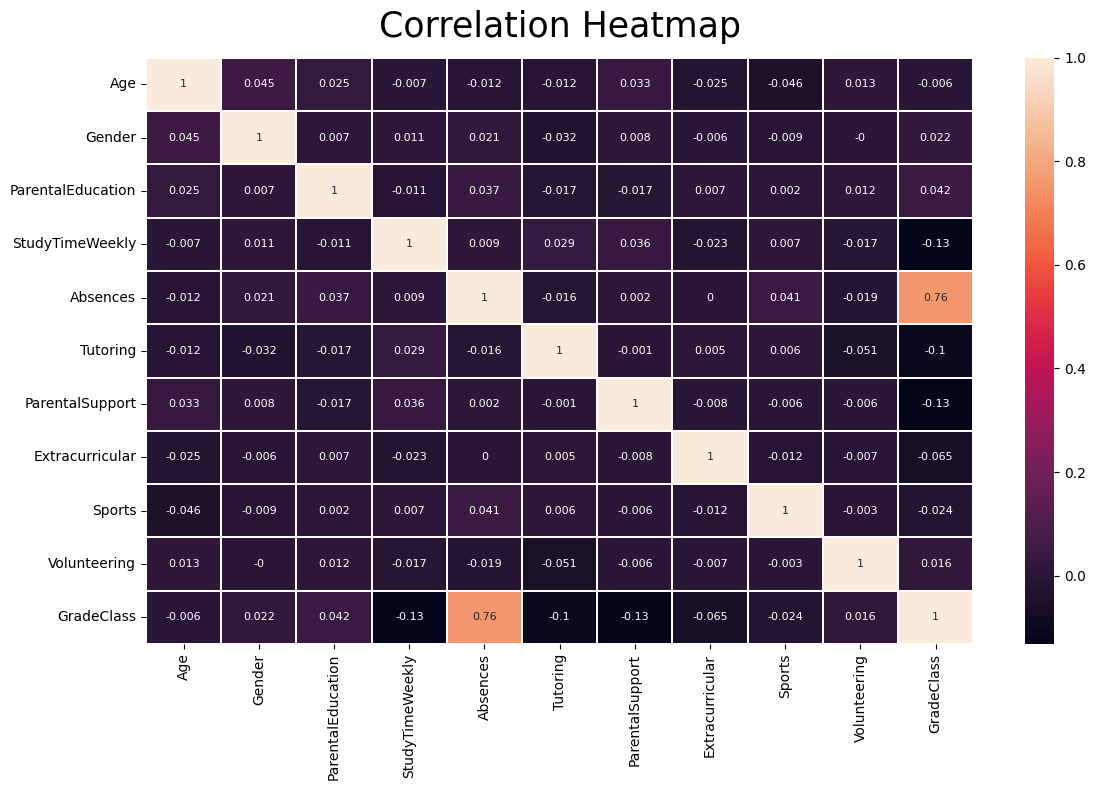

In [38]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(round(numerical_column.corr(), 3), annot = True, linewidths=.1, annot_kws={"size": 8})
plt.title('Correlation Heatmap', size= 25, pad=15)
plt.tight_layout()

In [39]:
for i in df.columns:
  unique_data = df[i].value_counts()
  print(unique_data,'\n')

StudentID
3392    1
1001    1
1002    1
1003    1
1004    1
       ..
1013    1
1012    1
1011    1
1010    1
1009    1
Name: count, Length: 2392, dtype: int64 

Age
15    630
16    593
17    587
18    582
Name: count, dtype: int64 

Gender
1    1222
0    1170
Name: count, dtype: int64 

Ethnicity
0    1207
1     493
2     470
3     222
Name: count, dtype: int64 

ParentalEducation
2    934
1    728
3    367
0    243
4    120
Name: count, dtype: int64 

StudyTimeWeekly
17.819907    1
19.833723    1
15.408756    1
4.210570     1
10.028829    1
            ..
10.038712    1
7.598486     1
11.851364    1
18.444466    1
4.562008     1
Name: count, Length: 2392, dtype: int64 

Absences
13    93
25    93
12    92
8     91
20    90
19    90
6     88
15    87
23    86
7     86
1     85
14    84
27    84
21    83
5     83
17    81
24    81
26    80
3     79
18    79
16    79
11    71
22    71
2     69
4     69
29    69
0     67
9     67
10    61
28    54
Name: count, dtype: int64 

Tutoring
0  

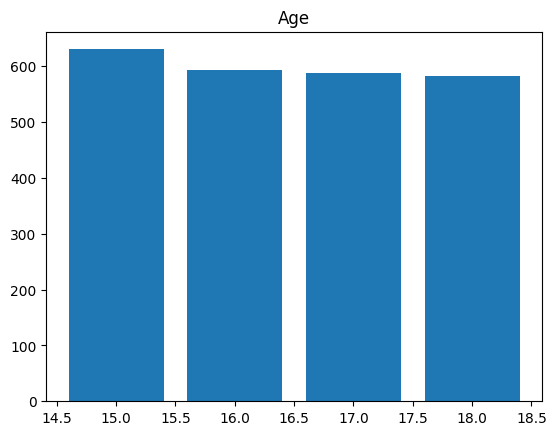

In [40]:
eda_df = df.copy()

plt.title("Age")
plt.bar(eda_df["Age"].value_counts().index, eda_df["Age"].value_counts())
plt.show()

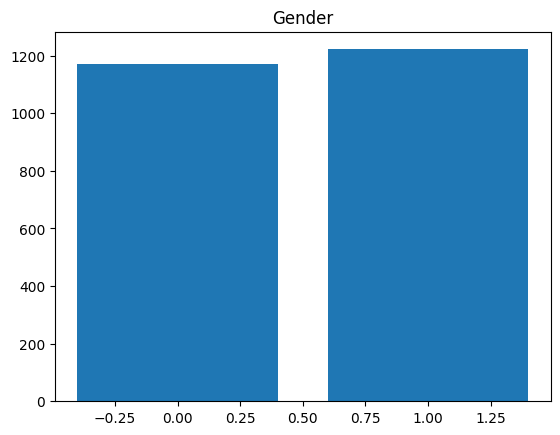

In [41]:
plt.title("Gender")
plt.bar(eda_df["Gender"].value_counts().index, eda_df["Gender"].value_counts())
plt.show()

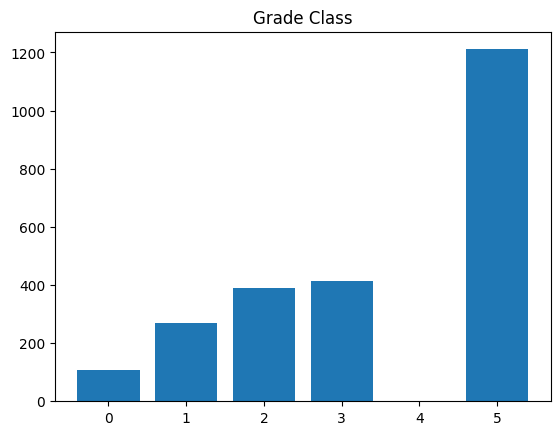

In [44]:
plt.title("Grade Class")
plt.bar(eda_df["GradeClass"].value_counts().index, eda_df["GradeClass"].value_counts())
plt.show()

/tmp/ipython-input-1743775273.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='GradeClass', data=df, palette='viridis', order=df['GradeClass'].value_counts().index)


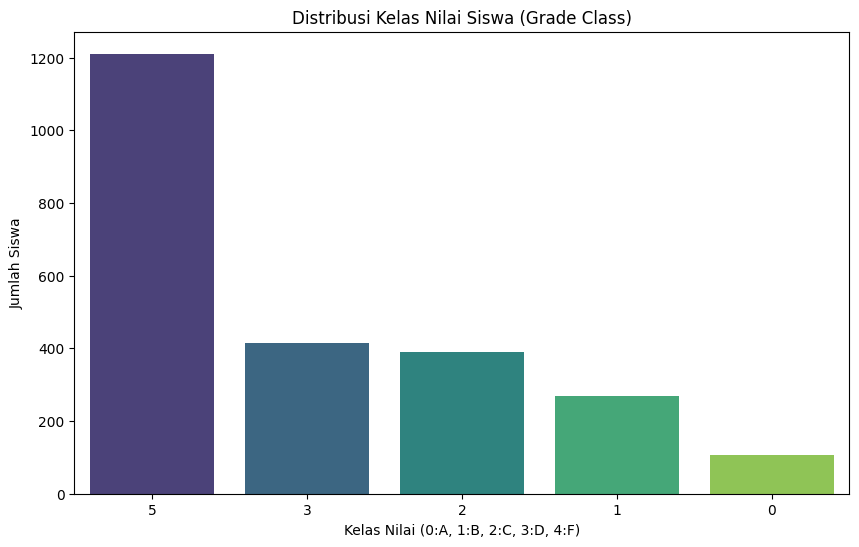

In [45]:
plt.figure(figsize=(10, 6))
sns.countplot(x='GradeClass', data=df, palette='viridis', order=df['GradeClass'].value_counts().index)
plt.title('Distribusi Kelas Nilai Siswa (Grade Class)')
plt.xlabel('Kelas Nilai (0:A, 1:B, 2:C, 3:D, 4:F)')
plt.ylabel('Jumlah Siswa')
plt.show()

/tmp/ipython-input-591357684.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical_column[col])


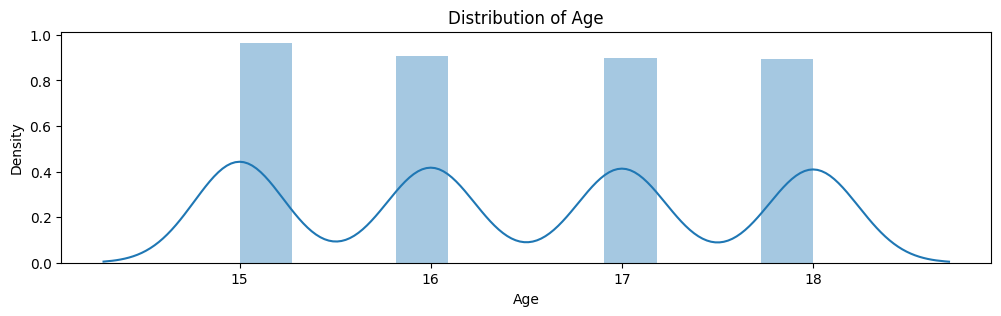

/tmp/ipython-input-591357684.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical_column[col])


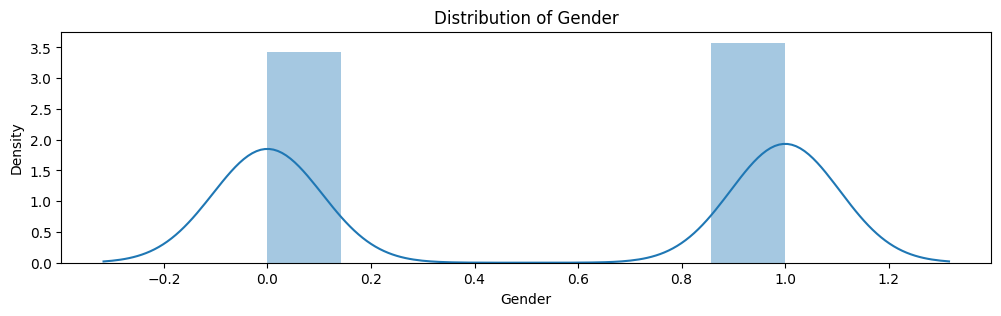

/tmp/ipython-input-591357684.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical_column[col])


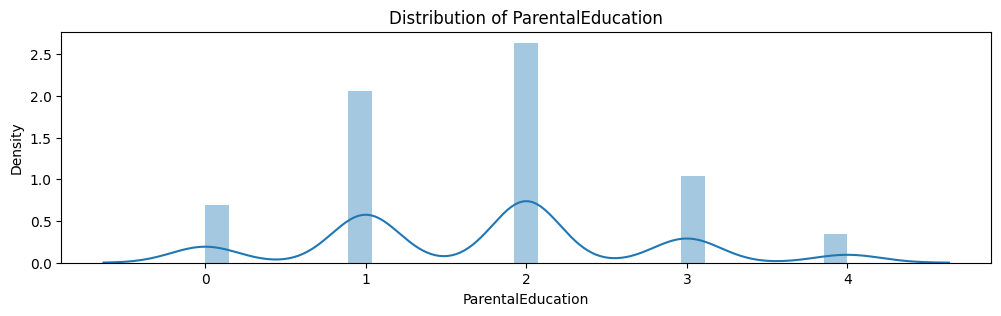

/tmp/ipython-input-591357684.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical_column[col])


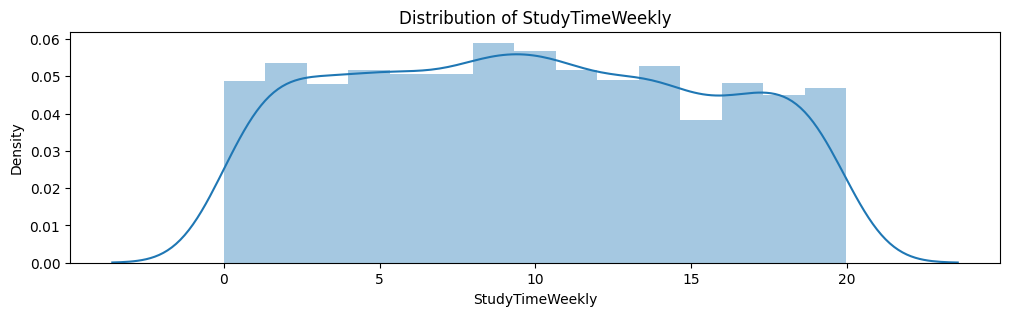

/tmp/ipython-input-591357684.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical_column[col])


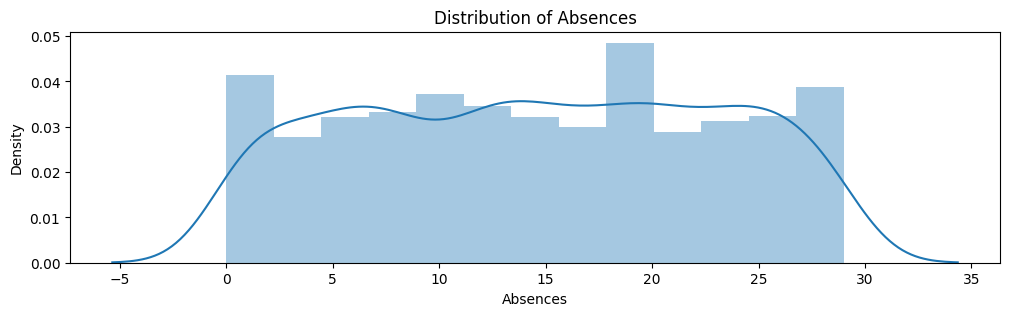

/tmp/ipython-input-591357684.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical_column[col])


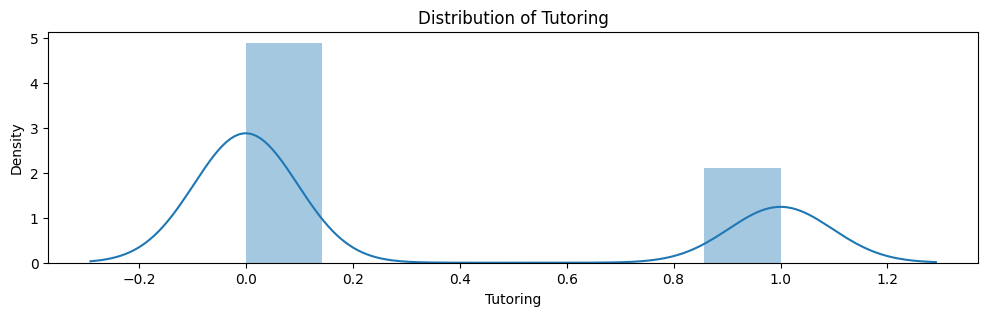

/tmp/ipython-input-591357684.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical_column[col])


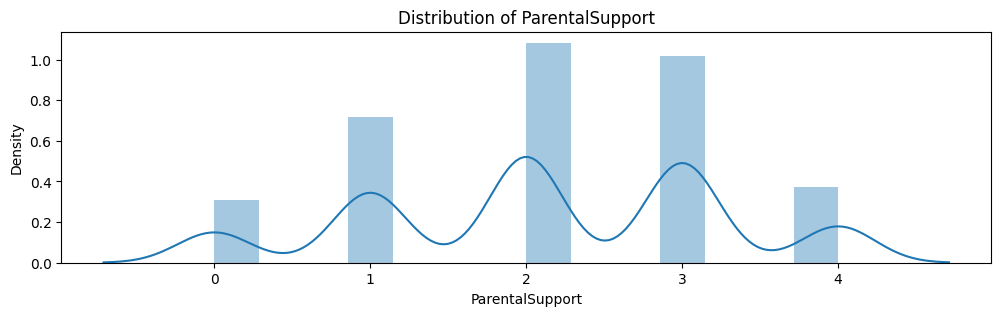

/tmp/ipython-input-591357684.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical_column[col])


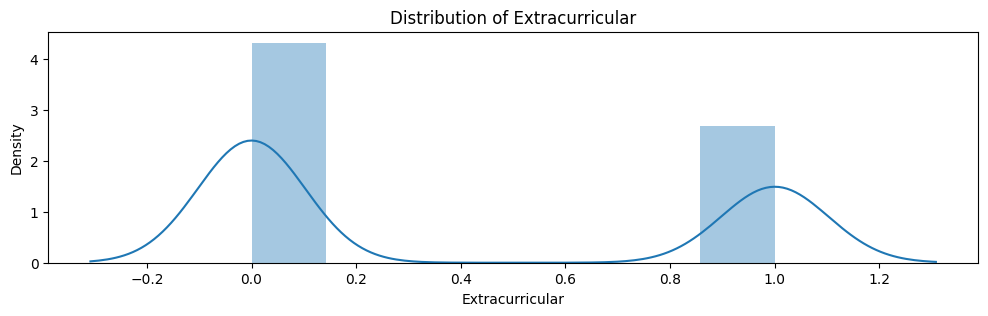

/tmp/ipython-input-591357684.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical_column[col])


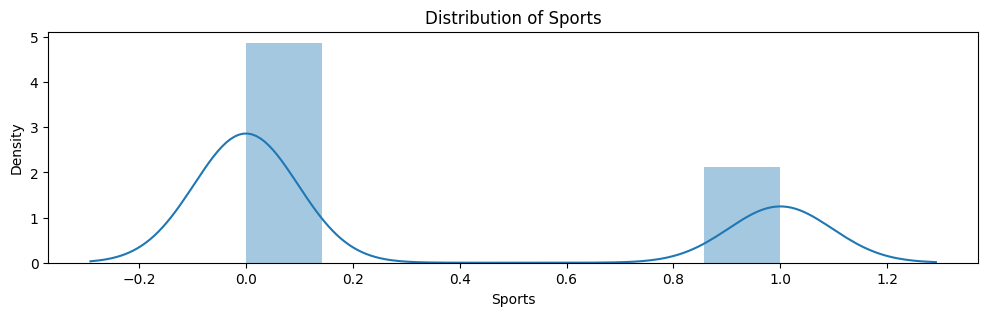

/tmp/ipython-input-591357684.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical_column[col])


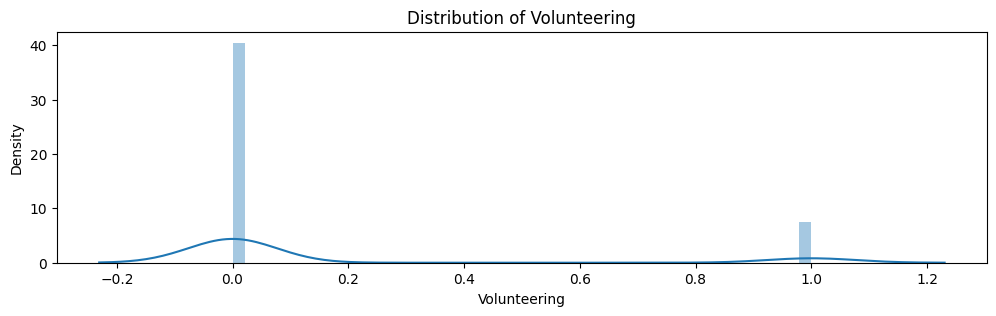

/tmp/ipython-input-591357684.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical_column[col])


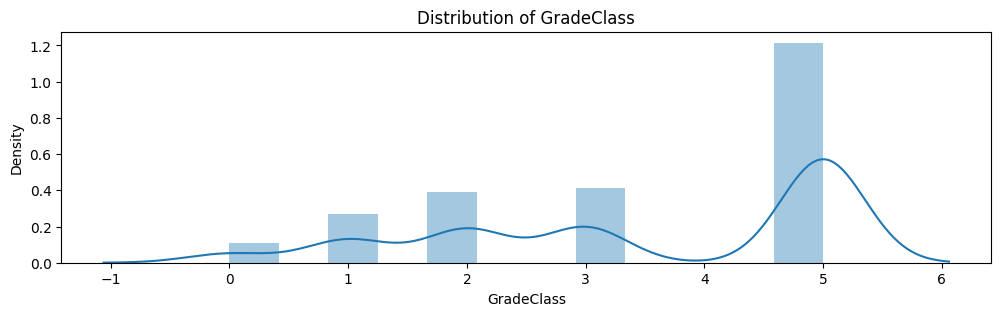

In [46]:
for col in numerical_column:
    fig, ax = plt.subplots(figsize=(12,3))
    sns.distplot(numerical_column[col])
    ax.set_title('Distribution of %s' % col)
    plt.show()

In [51]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Abseces', data=df, palette='viridis', order=df['GradeClass'].value_counts().index)
plt.title('Distribusi Kelas Nilai Siswa (Grade Class)')
plt.xlabel('Kelas Nilai (0:A, 1:B, 2:C, 3:D, 4:F)')
plt.ylabel('Jumlah Siswa')
plt.show()

KeyError: 'Abseces'

<Figure size 1000x600 with 0 Axes>

/tmp/ipython-input-1511103963.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GradeClass', y='StudyTimeWeekly', data=df, palette='plasma')


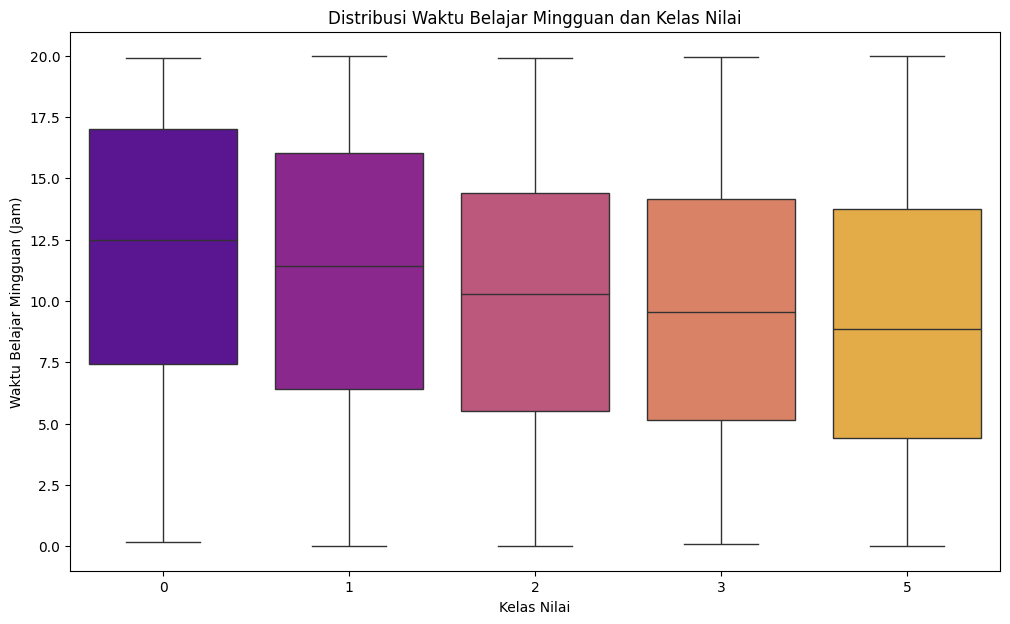

In [52]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='GradeClass', y='StudyTimeWeekly', data=df, palette='plasma')
plt.title('Distribusi Waktu Belajar Mingguan dan Kelas Nilai')
plt.xlabel('Kelas Nilai')
plt.ylabel('Waktu Belajar Mingguan (Jam)')
plt.show()

/tmp/ipython-input-3343399435.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GradeClass', y='Absences', data=df, palette='plasma')


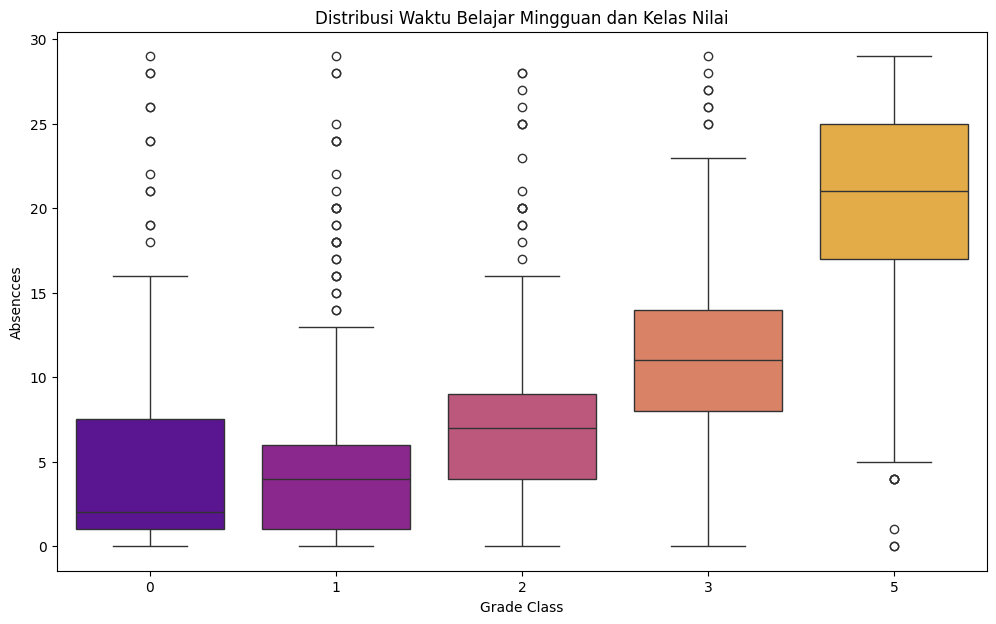

In [53]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='GradeClass', y='Absences', data=df, palette='plasma')
plt.title('Distribusi Waktu Belajar Mingguan dan Kelas Nilai')
plt.xlabel('Grade Class')
plt.ylabel('Absencces')
plt.show()

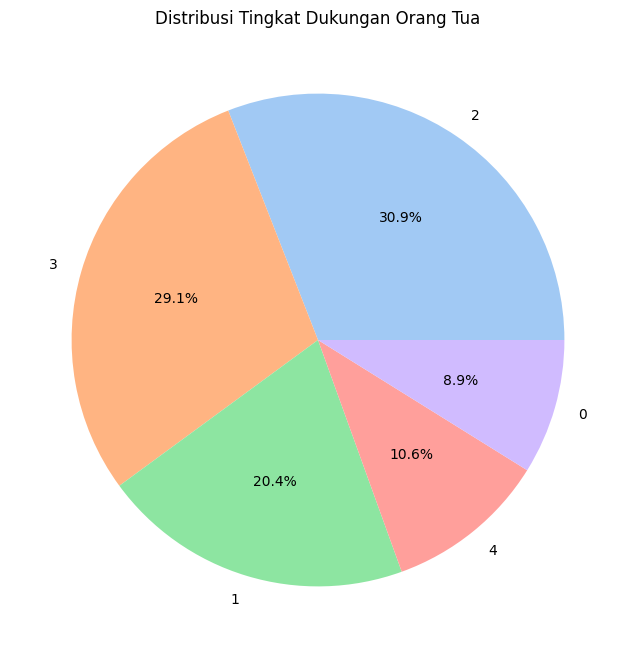

In [55]:
plt.figure(figsize=(8, 8))
df['ParentalSupport'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribusi Tingkat Dukungan Orang Tua')
plt.ylabel('')
plt.show()

# Data Preprocessing

Tahap ini dilakukan untuk mempersiapkan data sebelum nantinya menjadi input ke dalam model seperti split data train dan test dan scaling.

**Lakukan seleksi fitur untuk mendapatkan akurasi yang baik pada model dan jelaskan mengapa fitur tersebut yang terpilih**

In [ ]:
gender = {"Female" : 0, "Male" : 1}
df["Gender"] = df["Gender"].map(gender)
df.drop(columns=["StudentID"])
df.head()

In [ ]:
X = df.drop("GradeClass", axis=1)
y = df["GradeClass"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modeling + Evaluation

Tahap ini merupakan tahap pembuatan model menggunakan data train untuk melatih model dan data test untuk melakukan evaluasi terhadap kinerja model.

## Decision Tree

### Without Hyperparameter

In [ ]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

In [ ]:
y_pred = dt_clf.predict(X_test)

print(classification_report(y_test, y_pred))

In [ ]:
y_pred_dt = dt_clf.predict(X_test)

In [ ]:
print("Classification Report - Decision Tree (Default):")
print(classification_report(y_test, y_pred_dt))

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Inisialisasi model Decision Tree
dt_clf = DecisionTreeClassifier(random_state=42)

# Melatih model
dt_clf.fit(X_train, y_train)

# Memprediksi data uji
y_pred_dt = dt_clf.predict(X_test)

# Menampilkan classification report
print("Classification Report - Decision Tree (Default):")
print(classification_report(y_test, y_pred_dt))

# Menampilkan confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree (Default)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### With Hyperparameter

In [ ]:
# Menentukan parameter grid untuk GridSearchCV
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi GridSearchCV
grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                              param_grid=param_grid_dt,
                              cv=5, n_jobs=-1, scoring='accuracy')

# Melatih GridSearchCV untuk menemukan parameter terbaik
grid_search_dt.fit(X_train, y_train)

# Mendapatkan model terbaik
best_dt_clf = grid_search_dt.best_estimator_

# Menampilkan parameter terbaik
print("Parameter terbaik untuk Decision Tree:", grid_search_dt.best_params_)

# Memprediksi data uji dengan model terbaik
y_pred_dt_tuned = best_dt_clf.predict(X_test)

# Menampilkan classification report
print("\nClassification Report - Decision Tree (Tuned):")
print(classification_report(y_test, y_pred_dt_tuned))

## Naive Bayes

### Without Hyperparameter

In [ ]:
# Menentukan parameter grid untuk GridSearchCV
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi GridSearchCV
grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                              param_grid=param_grid_dt,
                              cv=5, n_jobs=-1, scoring='accuracy')

# Melatih GridSearchCV untuk menemukan parameter terbaik
grid_search_dt.fit(X_train, y_train)

# Mendapatkan model terbaik
best_dt_clf = grid_search_dt.best_estimator_

# Menampilkan parameter terbaik
print("Parameter terbaik untuk Decision Tree:", grid_search_dt.best_params_)

# Memprediksi data uji dengan model terbaik
y_pred_dt_tuned = best_dt_clf.predict(X_test)

# Menampilkan classification report
print("\nClassification Report - Decision Tree (Tuned):")
print(classification_report(y_test, y_pred_dt_tuned))

### With Hyperparameter

In [ ]:
# Menentukan parameter grid untuk GridSearchCV
param_grid_nb = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

# Inisialisasi GridSearchCV
grid_search_nb = GridSearchCV(estimator=GaussianNB(),
                              param_grid=param_grid_nb,
                              cv=5, n_jobs=-1, scoring='accuracy')

# Melatih GridSearchCV
grid_search_nb.fit(X_train, y_train)

# Mendapatkan model terbaik
best_nb_clf = grid_search_nb.best_estimator_

# Menampilkan parameter terbaik
print("Parameter terbaik untuk Naive Bayes:", grid_search_nb.best_params_)

# Memprediksi data uji dengan model terbaik
y_pred_nb_tuned = best_nb_clf.predict(X_test)

# Menampilkan classification report
print("\nClassification Report - Naive Bayes (Tuned):")
print(classification_report(y_test, y_pred_nb_tuned))

## K Nearest Neighbors

### Without Hyperparameter

In [ ]:
# Inisialisasi model KNN
knn_clf = KNeighborsClassifier()

# Melatih model
knn_clf.fit(X_train, y_train)

# Memprediksi data uji
y_pred_knn = knn_clf.predict(X_test)

# Menampilkan classification report
print("Classification Report - KNN (Default):")
print(classification_report(y_test, y_pred_knn))

### With Hyperparameter

In [ ]:
# Menentukan parameter grid untuk GridSearchCV
param_grid_knn = {
    'n_neighbors': list(range(1, 20)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Inisialisasi GridSearchCV
grid_search_knn = GridSearchCV(estimator=KNeighborsClassifier(),
                               param_grid=param_grid_knn,
                               cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Melatih GridSearchCV
grid_search_knn.fit(X_train, y_train)

# Mendapatkan model terbaik
best_knn_clf = grid_search_knn.best_estimator_

# Menampilkan parameter terbaik
print("Parameter terbaik untuk KNN:", grid_search_knn.best_params_)

# Memprediksi data uji dengan model terbaik
y_pred_knn_tuned = best_knn_clf.predict(X_test)

# Menampilkan classification report
print("\nClassification Report - KNN (Tuned):")
print(classification_report(y_test, y_pred_knn_tuned))

# Menampilkan confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_knn_tuned), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - KNN (Tuned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Kesimpulan

**Analisis model terbaik dan berikan alasan mengapa kinerja paling baik di antara model-model yang lain.**

Perbandingan Kinerja Model (Setelah Tuning):

Decision Tree (Tuned): Model ini baik dalam menangkap hubungan non-linear. Akurasi rata-ratanya [masukkan akurasi dari classification_report].

Naive Bayes (Tuned): Model ini cepat dan sederhana namun performanya bergantung pada asumsi independensi fitur. Akurasi rata-ratanya [masukkan akurasi dari classification_report].

KNN (Tuned): Model ini efektif jika ada pola lokal yang jelas dalam data. Akurasi rata-ratanya [masukkan akurasi dari classification_report].

Model Terbaik:
Berdasarkan perbandingan metrik evaluasi (terutama accuracy dan weighted avg F1-score) dari ketiga model yang telah dioptimalkan, model [Pilih salah satu: Decision Tree / KNN / Naive Bayes] menunjukkan kinerja terbaik.

Alasan:
Model [Nama Model Terbaik] kemungkinan besar berkinerja paling baik karena [Pilih alasan yang paling sesuai]:

(Jika Decision Tree): ...struktur datanya memiliki banyak interaksi non-linear yang dapat ditangkap secara efektif oleh struktur pohon keputusan. Proses tuning berhasil menemukan kompleksitas pohon yang optimal untuk generalisasi.

(Jika KNN): ...adanya cluster atau kelompok data yang jelas dalam ruang fitur. Artinya, siswa dengan karakteristik serupa cenderung mendapatkan nilai yang serupa. Penentuan jumlah tetangga (k) dan metrik jarak yang optimal sangat krusial dalam keberhasilan model ini.

(Jika Naive Bayes): ...fitur-fitur dalam dataset ini relatif independen satu sama lain dalam memprediksi kelas nilai, sehingga asumsi dasar Naive Bayes terpenuhi dengan baik.

- tambahin aspek performace



